# Explanatory Analysis of Ford GoBike Trip Data
by Mikael Lopez

In this analysis I'm going to explore Ford GoBike trip data that contains information about around 170,000 individual trips from February of 2019. I will focus on the gender and age of users, as well as trip duration.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [19]:
df = pd.read_csv("biketripdata.csv")
df2 = df.copy()
df2 = df2[(df2.member_gender.notnull()) & (df2.start_station_id.notnull())]
df2.member_birth_year = df2.member_birth_year.astype(int)

The dataset contains three categories of gender: *male*, *female*, and *other*. There's a significant difference in size between the three categories, with the *male* category being the largest, more than three times larger than the *female* category. The disproportionate amount of male users in the dataset means that any reference to a "general" trend has to be partly viewed as a largely male trend.

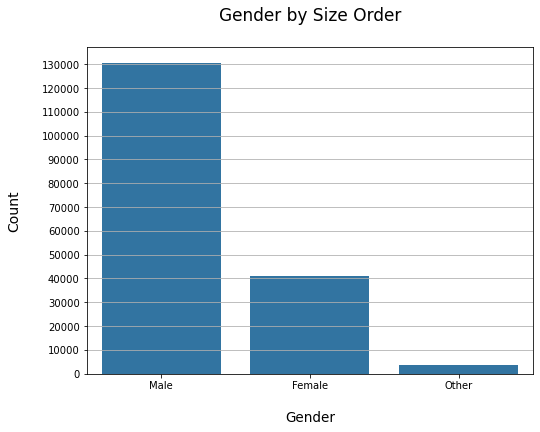

In [29]:
gender_counts = df2.member_gender.value_counts()
gender_order = df2.member_gender.value_counts().index

base_color = sb.color_palette()[0]
yticks = np.arange(0, 140000, 10000)

plt.figure(figsize = [8, 6])
p = sb.countplot(data = df2, x = "member_gender", color = base_color, order = gender_order)
plt.title("Gender by Size Order\n", fontsize = 17)
plt.xlabel("\nGender", fontsize = 13.5)
plt.ylabel("Count\n", fontsize = 14)
plt.yticks(yticks)
plt.grid(axis = "y");

The dataset contains users with ages ranging from 19 to 142, but the number of users over 80 is insignificant. The majority of users are, unsurprisingly, relatively young, below 50, and the largest group of users are between 26 to 35.

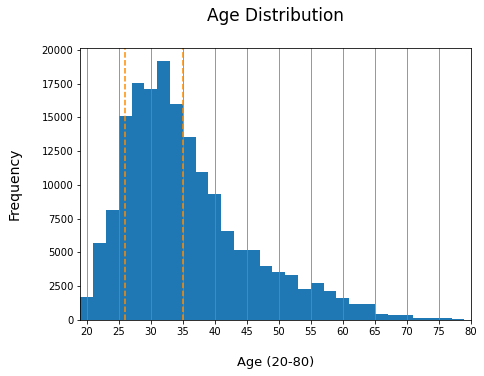

In [4]:
df2["age"] = 2018 - df2.member_birth_year

bins = np.arange(19, 80 + 2, 2)
xticks = np.arange(20, 80 + 2, 5)

plt.figure(figsize = [7, 5])
plt.hist(df2.age, bins = bins)
plt.xlim(19, 80)
plt.xticks(xticks)
plt.grid(axis = "x", color = "grey")
plt.title("Age Distribution\n", fontsize = 17)
plt.xlabel("\nAge (20-80)", fontsize = 13)
plt.ylabel("Frequency\n", fontsize = 14)
plt.axvline(26, color = "darkorange", linestyle = "--")
plt.axvline(35, color = "darkorange", linestyle = "--");

In [5]:
df2_male = df2.query("member_gender == 'Male'")
df2_female = df2.query("member_gender == 'Female'")
df2_other = df2.query("member_gender == 'Other'")

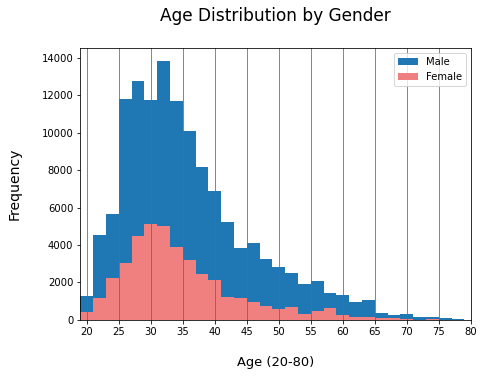

In [6]:
bins = np.arange(19, 80 + 2, 2)
xticks = np.arange(20, 80 + 2, 5)

plt.figure(figsize = [7, 5])
plt.hist(df2_male.age, bins = bins)
plt.hist(df2_female.age, bins = bins, color = "lightcoral")
plt.xlim(19, 80)
plt.xticks(xticks)
plt.grid(axis = "x", color = "dimgrey")
plt.title("Age Distribution by Gender\n", fontsize = 17)
plt.xlabel("\nAge (20-80)", fontsize = 13)
plt.ylabel("Frequency\n", fontsize = 14)
plt.legend(["Male", "Female"]);

In [7]:
df2["duration_min"] = df2.duration_sec / 60

Most trips last about 4-10 minutes, after which they quickly become increasingly shorter and shorter.

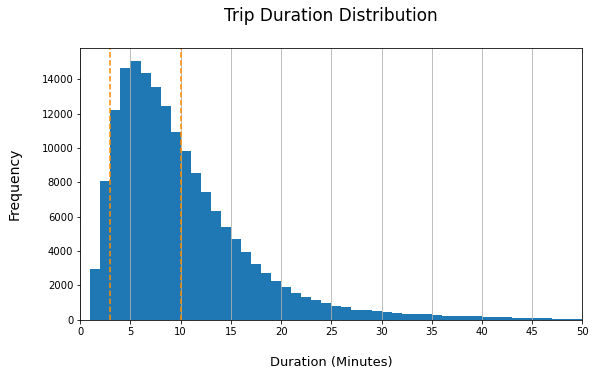

In [8]:
bins = np.arange(0, 50 + 1, 1)
xticks = np.arange(0, 50 + 1, 5)

plt.figure(figsize = [9, 5])
plt.hist(df2.duration_min, bins = bins)
plt.xlim(left = 0, right = 50)
plt.xticks(xticks)
plt.grid(axis = "x")
plt.title("Trip Duration Distribution\n", fontsize = 17)
plt.xlabel("\nDuration (Minutes)", fontsize = 13)
plt.ylabel("Frequency\n", fontsize = 14)
plt.axvline(3, color = "darkorange", linestyle = "--")
plt.axvline(10, color = "darkorange", linestyle = "--");

Both age and trip duration displayed a large concentration of trips with users who are relatively young and durations that are relatively short (at least compared to the full range of durations within the dataset). Is there a relationship between age and trip duration? That is, is there a correlation between the age of a user and the duration of a trip?

There is a relationship between age and trip duration, a negative correlation, meaning that as the age of a user decreases, so does the duration of a trip. The trend is not very steep, most clear for trip durations below 150 minutes, starting around the age of 30; there's a much less clear trend for trips longer than that, but the range of trip durations for users over 50 is visibly more narrow than for those under 50.

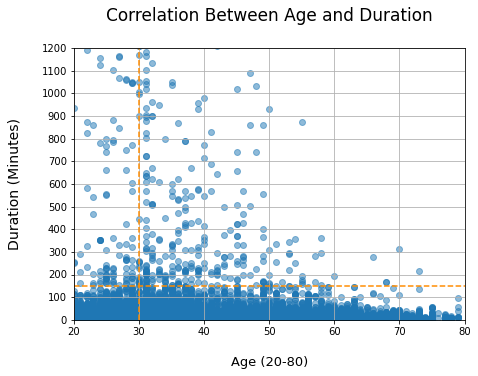

In [9]:
yticks = np.arange(0, 1200 + 1, 100)
plt.figure(figsize = [7, 5])
plt.scatter(data = df2, x = "age", y = "duration_min", alpha = 0.5)
plt.xlim(20, 80)
plt.ylim(0, 1200)
plt.yticks(yticks)
plt.grid()
plt.title("Correlation Between Age and Duration\n", fontsize = 17)
plt.xlabel("\nAge (20-80)", fontsize = 13)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.axvline(30, color = "darkorange", linestyle = "--")
plt.axhline(150, color = "darkorange", linestyle = "--");

Is there any significant difference in the relationship between age and trip duration in terms of gender?

The correlation between age and trip duration follows the general trend for both the *male* and *female* categories, but the *other* category doesn't display any clear trend. The *other* category's trip durations are generally below 100 minutes (for the main age range of 20-62), except for a sudden wide range of trip durations for users who are about 31, but that sudden wide range just as suddenly returns to the general, narrow range of trip durations.

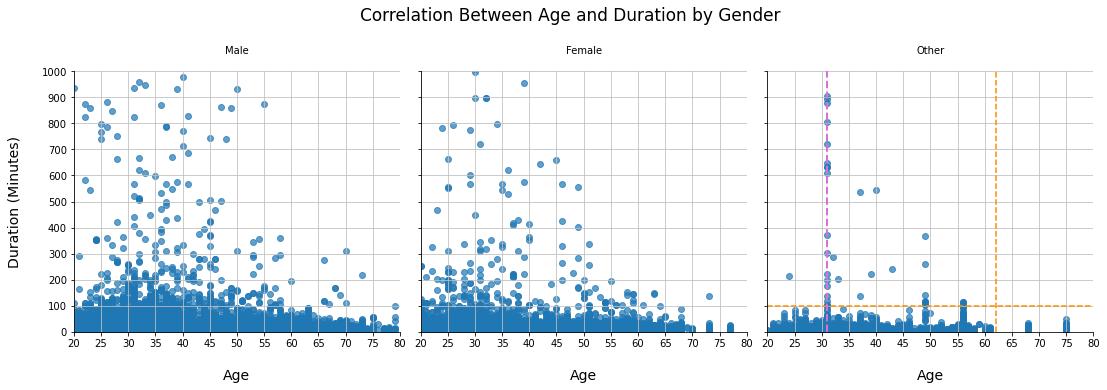

In [10]:
xticks = np.arange(20, 80 + 1, 5)
yticks = np.arange(0, 1000 + 1, 100)

g = sb.FacetGrid(data = df2, col = "member_gender", col_order = gender_order, 
                 height = 5, aspect = 1, xlim = (17, 80), ylim = (0, 1000))
g.map(plt.scatter, "age", "duration_min", alpha = 0.7)
g.map(plt.grid, color = "silver")
plt.xlim(20, 80)
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle("Correlation Between Age and Duration by Gender", fontsize = 17)
g.set_titles(col_template = "{col_name}\n")
g.set_axis_labels("\nAge", "Duration (Minutes)\n", fontsize = 14)
plt.xticks(xticks)
plt.yticks(yticks)
plt.axvline(62, color = "darkorange", linestyle = "--")
plt.axhline(100, color = "darkorange", linestyle = "--")
plt.axvline(31, color = "orchid", linestyle = "--", linewidth = 2);

As an aside, it's interesting to note that the smallest gender category in terms of size, *other*, has the longest average trip duration, while the largest gender category, *male*, has the shortest average trip duration.

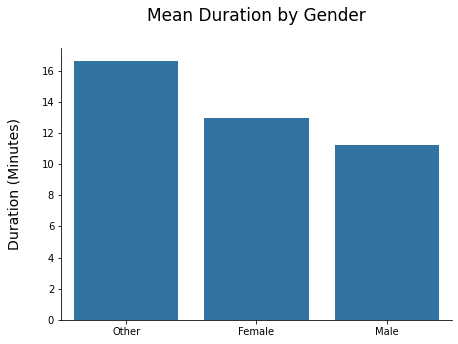

In [86]:
gender_duration_order = df2.groupby("member_gender").duration_min.mean().sort_values(ascending = False).index
base_color = sb.color_palette()[0]

plt.figure(figsize = [7, 5])
mdg = sb.barplot(data = df2, x = "member_gender", y = "duration_min", color = base_color, 
                 order = gender_duration_order, ci = None)
plt.title("Mean Duration by Gender\n", fontsize = 17)
plt.xlabel("")
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
#mdg.set(yticks = [])
sb.despine(top = True);

Many of these insights lead to further questions.

There is a disproportionate amount of men present in the data – is this an indication that men bike share more than women? Or did men simply bike share more during this particular month? Do men bike share more during this particular season, during winter?

We need more data, from a wider variety of months, preferably the entire year, to draw any further conclusions.

The majority of users in the dataset are relatively young – is this typical of bike share users? Is winter a good time to measure the typical characteristics of an outdoor activity?

While it may feel logical and intuitive to believe that bike share users are generally relatively young, as this would be in line with how most of us think about age and outdoor activities, preconceived notions should weigh lightly in data analysis. More data, perhaps only from one more month, preferably a summer month, would be necessary for us to speculate with more confidence.

The correlation between age and trip duration for the gender category *other* doesn't display any clear trend, and there's a sudden wide range of trip durations for users who are about 31 – what does this sudden rise mean, if anything?

We would first need to understand what the definition of the *other* category is exactly, who and what falls under this umbrella term, but, unfortunately, this definition is not available in this dataset. There may be other variables in the dataset that can help us understand this sudden wide range of trip durations, but this understanding would probably be incomplete without knowing more about this particular gender category.

There is clearly much more to explore in this dataset, but this short analysis ends here!

In [31]:
#!jupyter nbconvert explanatory_report.ipynb --to slides --post serve  --no-input --no-prompt